### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from math import sqrt

from rdkit import Chem

from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error




### Load Data

In [2]:
%store -r X_train
%store  -r X_test  
%store -r y_train
%store -r  y_test

In [3]:
%store -r log_y
%store -r X

In [4]:
# X_train = X
# y_train = log_y

(194, 3)
(299, 3)


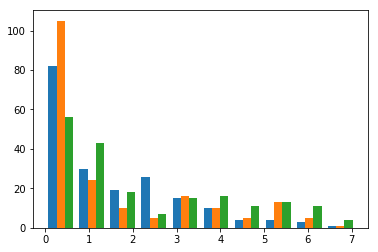

In [5]:
plt.hist(y_train)
print(y_train.shape)
print(log_y.shape)

## Tuning the SVR first

### Define RMSE$_{CV}$  score

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

### Define the regressor to be tuned

In [7]:
svr = SVR()

scaler = StandardScaler()

steps = [('scaler', scaler), ('svr', svr)]
pipeline = Pipeline(steps) # define the pipeline object.

### Define the grid search

In [8]:
parameters = {'svr__kernel': ('rbf',"linear"),
              'svr__gamma': [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1],
              "svr__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "svr__epsilon" : [ 1e-4, 1e-3, 1e-2, 0.1, 1,10,100]}

grid_mse = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = rmse_scorer, n_jobs = -1)

### Optimize the DCAA regressor

In [9]:
#benckmark using only default values

DCAA_train_mse = model_selection.cross_validate(pipeline, X,log_y[:,0], scoring = rmse_scorer, cv = 5, n_jobs = -1)
DCAA_train_rmse = mean(np.sqrt(-DCAA_train_mse["test_score"]))
DCAA_train_rmse

1.1939835455472043

In [10]:
# Tuning DCAA regressor for the first time using MSE 

grid_mse.fit(X, log_y[:,0])
print ("RMSE$_{CV_{DCAA}}$ = %3.2f" %(np.sqrt(-grid_mse.best_score_)))
DCAA_params = grid_mse.best_params_
DCAA_params
#print ("Best params with RMSE$_{CV_{DCAA}}$ = %3.2f" % DCAA_params)
#DCAA_regressor = grid.best_estimator_

RMSE$_{CV_{DCAA}}$ = 1.07


{'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 0.001, 'svr__kernel': 'rbf'}

In [106]:
# Tuning DCAA regressor for the second time using MSE

parameters_2 = {'svr__kernel': ('rbf',"linear"),
              'svr__gamma': [1e-4,3e-4,6e-4, 1e-3, 3e-3, 6e-3, 1e-2],
              "svr__C": [1, 3, 6, 10, 30, 60, 100],
              "svr__epsilon" : [1e-4,3e-4,6e-4, 1e-3, 3e-3,1e-2, 3e-2, 6e-2, 0.1, 0.3, 0.6, 10]}


grid_2_mse = GridSearchCV(pipeline, param_grid=parameters_2, cv=5, scoring = rmse_scorer, n_jobs = -1)

grid_2_mse.fit(X, log_y[:,0])
print ("RMSE$_{CV_{DCAA}}$ = %3.2f" %(np.sqrt(-grid_2_mse.best_score_)))
DCAA_params = grid_2_mse.best_params_
DCAA_params

RMSE$_{CV_{DCAA}}$ = 1.06


{'svr__C': 6,
 'svr__epsilon': 0.0003,
 'svr__gamma': 0.003,
 'svr__kernel': 'rbf'}

### Optimize the TCAA regressor

In [12]:
#benckmark using only default values

TCAA_train_mse = model_selection.cross_validate(pipeline, X, log_y[:,1], scoring = rmse_scorer, cv = 5)
TCAA_train_rmse = mean(np.sqrt(-TCAA_train_mse["test_score"]))
TCAA_train_rmse

1.3398542449962354

In [13]:
# Tuning TCAA regressor for the first time using MSE 

grid_mse.fit(X, log_y[:,1])
print ("RMSE$_{CV_{TCAA}}$ = %3.2f" %(np.sqrt(-grid_mse.best_score_)))
TCAA_params = grid_mse.best_params_
TCAA_params

RMSE$_{CV_{TCAA}}$ = 1.31


{'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 0.001, 'svr__kernel': 'rbf'}

In [14]:
# Tuning TCAA regressor for the second time using MSE

parameters_2 = {'svr__kernel': ('rbf',"linear"),
              'svr__gamma': [1e-4,3e-4,6e-4, 1e-3, 3e-3, 6e-3, 1e-2],
              "svr__C": [1, 3, 6, 10, 30, 60, 100],
              "svr__epsilon" : [ 1e-2, 3e-2, 6e-2, 0.1, 0.3, 0.6, 10]}


grid_2_mse = GridSearchCV(pipeline, param_grid=parameters_2, cv=5, scoring = rmse_scorer, n_jobs = -1)

grid_2_mse.fit(X, log_y[:,1])
print ("RMSE$_{CV_{TCAA}}$ = %3.2f" %(np.sqrt(-grid_2_mse.best_score_)))
TCAA_params = grid_2_mse.best_params_
TCAA_params

RMSE$_{CV_{TCAA}}$ = 1.29


{'svr__C': 3, 'svr__epsilon': 0.3, 'svr__gamma': 0.001, 'svr__kernel': 'rbf'}

### Optimize the sumHAAs regressor

In [15]:
# # Tuning sumHAAs regressor for the first time using MSE 

# grid_mse.fit(X_train, y_train[:,2])
# print ("RMSE$_{CV_{sumHAAs}}$ = %3.2f" %(np.sqrt(-grid_mse.best_score_)))
# HAA_params = grid_mse.best_params_
# HAA_params

In [16]:
# # Tuning sumHAAs regressor for the second time using MSE 

# parameters_2 = {'svr__kernel': ('rbf',"linear"),
#               'svr__gamma': [1e-4,3e-4,6e-4, 1e-3, 3e-3, 6e-3, 1e-2],
#               "svr__C": [1, 3, 6, 10, 30, 60, 100],
#               "svr__epsilon" : [ 1e-2, 3e-2, 6e-2, 0.1, 0.3, 0.6, 10]}


# grid_2_mse = GridSearchCV(pipeline, param_grid=parameters_2, cv=5, scoring = rmse_scorer)

# grid_2_mse.fit(X_train, y_train[:,2])
# print ("RMSE$_{CV_{sumHAAs}}$ = %3.2f" %(np.sqrt(-grid_2_mse.best_score_)))
# HAA_params = grid_2_mse.best_params_
# HAA_params

## Tuning the RF

### Define the regressor to be tuned

In [16]:
### should i fix the random state???

rf = RandomForestRegressor(random_state = 17)

scaler = StandardScaler()

steps = [('scaler', scaler), ('rf', rf)]

pipeline = Pipeline(steps) # define the pipeline object.


### Define the grid search
##### !1 is a general search, 2 is defined near best params for search 1


In [17]:
#n_estimators = Number of trees (ntree) /500

#number of variables randomly sampled at each tree node (mtry) -  1/3 of features
        #max_samplesint or float, default=None
            #If bootstrap is True, the number of samples to draw from X to train each base estimator.

    
    
#the minimum nodesize below which nodes are not further subdivided (nodesize)   5
    #min_samples_leaf? The minimum number of samples required to be at a leaf node- ? 


parameters = {
    'rf__n_estimators': [1,10,30,100,300],
    'rf__max_features': [3,10,30,100,300,"auto"],    
}

In [18]:
grid_r2 = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = "r2", n_jobs = -1)
grid_mse = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = rmse_scorer, n_jobs = -1)

## GridSearchCV for DCAA

In [11]:
#benckmark using only default values

DCAA_train_mse = model_selection.cross_validate(pipeline, X, log_y[:,0], scoring = rmse_scorer, cv = 5)
DCAA_train_rmse = mean(np.sqrt(-DCAA_train_mse["test_score"]))
DCAA_train_rmse

1.098932460508345

In [12]:
# Tuning DCAA regressor for the first time using MSE 

grid_mse.fit(X, log_y[:,0])
print ("RMSE$_{CV_{DCAA}}$ = %3.2f" %(np.sqrt(-grid_mse.best_score_)))
DCAA_params = grid_mse.best_params_
DCAA_params
#print ("Best parameters to predict DCAA = %3.2f" %DCAA_params)
#DCAA_regressor = grid.best_estimator_

RMSE$_{CV_{DCAA}}$ = 1.09


{'rf__max_features': 10, 'rf__n_estimators': 300}

In [13]:
parameters_2_DCAA = {
    'rf__n_estimators': [100, 300],
    'rf__max_features': [10, "auto"],
    'rf__min_samples_split': [0.003, 0.01, 0.03, 0.1, 0.3],
    'rf__min_samples_leaf': [0.003, 0.01, 0.03, 0.1, 0.3],
    'rf__max_depth': [1,3,10,30,100,300, None],
    'rf__max_leaf_nodes': [1,3,10,30,100,300, None]
}

grid_2_mse_DCAA = GridSearchCV(pipeline, param_grid=parameters_2_DCAA, cv=5, scoring = rmse_scorer, n_jobs = -1)

In [14]:
# Tuning DCAA regressor for the second time using MSE

grid_2_mse_DCAA.fit(X, log_y[:,0])
print ("RMSE$_{CV_{DCAA}}$ = %3.2f" %(np.sqrt(-grid_2_mse_DCAA.best_score_)))
DCAA_params = grid_2_mse_DCAA.best_params_
DCAA_params
#print ("Best params with RMSE$_{CV_{DCAA}}$ = %3.2f" % DCAA_params)
#DCAA_regressor = grid.best_estimator_

RMSE$_{CV_{DCAA}}$ = 1.08


{'rf__max_depth': 30,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__min_samples_leaf': 0.01,
 'rf__min_samples_split': 0.03,
 'rf__n_estimators': 300}

## Q$^2$

In [31]:
# calculate q2 without optimization
r2_DCAA_train = model_selection.cross_validate(pipeline, X, log_y[:,0], scoring = "r2", cv = 5)
r2_DCAA_train = mean(r2_DCAA_train["test_score"])
r2_DCAA_train

0.2581499160483281

In [32]:
# calculate q2 without optimization 

### should i fix the random state???

rf = RandomForestRegressor(random_state = 17)

scaler = StandardScaler()
steps = [('scaler', scaler), ('rf', rf)]
rf_optimized = Pipeline(steps) # define the pipeline object.

# calculate q2 after optimization 
r2_DCAA_train_opt = model_selection.cross_validate(rf_optimized, X, log_y[:,0], scoring = "r2", cv = 5)
r2_DCAA_train_opt = mean(r2_DCAA_train_opt["test_score"])
r2_DCAA_train_opt

0.2581499160483281

In [15]:
# calculate q2 after optimization 

### should i fix the random state???

rf = RandomForestRegressor(random_state = 17,
                                    n_estimators = 300,
                                    max_features = "auto",
                                    min_samples_split = 0.03,
                                    min_samples_leaf = 0.01,
                                    max_depth = 30,
                                    max_leaf_nodes = None)

scaler = StandardScaler()
steps = [('scaler', scaler), ('rf', rf)]
rf_optimized = Pipeline(steps) # define the pipeline object.

# calculate q2 after optimization 
r2_DCAA_train_opt = model_selection.cross_validate(rf_optimized, X, log_y[:,0], scoring = "r2", cv = 5)
r2_DCAA_train_opt = mean(r2_DCAA_train_opt["test_score"])
r2_DCAA_train_opt

0.2968544136272871

## GridSearchCV for TCAA

In [19]:
#benchmark of the rmse

score_TCAA_train_mse = model_selection.cross_validate(pipeline, X, log_y[:,1], scoring = rmse_scorer, cv = 5)
score_TCAA_train_rmse = mean(np.sqrt(-score_TCAA_train_mse["test_score"]))
score_TCAA_train_rmse

1.255441087544345

In [20]:
# Tuning TCAA regressor for the first time using MSE 

grid_mse.fit(X, log_y[:,1])
print ("RMSE$_{CV_{TCAA}}$ = %3.2f" %(np.sqrt(-grid_mse.best_score_)))
TCAA_params = grid_mse.best_params_
TCAA_params
#print ("Best params with RMSE$_{CV_{DCAA}}$ = %3.2f" % DCAA_params)
#DCAA_regressor = grid.best_estimator_

RMSE$_{CV_{TCAA}}$ = 1.23


{'rf__max_features': 30, 'rf__n_estimators': 30}

In [21]:
parameters_2_TCAA = {
    'rf__n_estimators': [30,100],
    'rf__max_features': [30, "auto"],
    'rf__min_samples_split': [1,2,3,6,10,30],
    'rf__min_samples_leaf': [1,2,3,6,10,30],
    'rf__max_depth': [1,3,10,30,100,300, None],
    'rf__max_leaf_nodes': [1,3,10,30,100,300, None]
}

grid_2_mse_TCAA = GridSearchCV(pipeline, param_grid=parameters_2_TCAA, cv=5, scoring = rmse_scorer, n_jobs = -1)

In [22]:
# Tuning TCAA regressor for the second time using MSE

grid_2_mse_TCAA.fit(X, log_y[:,1])
print ("RMSE$_{CV_{TCAA}}$ = %3.2f" %(np.sqrt(-grid_2_mse_TCAA.best_score_)))
TCAA_params = grid_2_mse_TCAA.best_params_
TCAA_params
#print ("Best params with RMSE$_{CV_{DCAA}}$ = %3.2f" % DCAA_params)
#DCAA_regressor = grid.best_estimator_

RMSE$_{CV_{TCAA}}$ = 1.23


{'rf__max_depth': 30,
 'rf__max_features': 30,
 'rf__max_leaf_nodes': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 30}

## Q$^2$

In [23]:
#benckmark using only default values    #rerun using cv10 there might bea  mistake!!

score_TCAA_train = model_selection.cross_validate(pipeline, X, log_y[:,1], scoring = "r2", cv = 5)
score_TCAA_train = mean(score_TCAA_train["test_score"])
score_TCAA_train

0.4311955914251664

In [28]:
# calculate q2 after optimization 
rf_optimized = RandomForestRegressor(random_state = 17,
                                    n_estimators = 30,
                                    max_features = 30,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    max_depth = 30,
                                    max_leaf_nodes = None)

# calculate q2 after optimization 
r2_TCAA_train_opt = model_selection.cross_validate(rf_optimized, X, log_y[:,1], scoring = "r2", cv = 5)
r2_TCAA_train_opt = mean(r2_TCAA_train_opt["test_score"])
r2_TCAA_train_opt

0.45754999596606954

## GridSearchCV for sumHAAs 

In [77]:
# # benchmark using default values

# score_HAA_train_mse = model_selection.cross_validate(pipeline, X_train,y_train[:,2], scoring = rmse_scorer, cv = 5)
# score_HAA_train_rmse = mean(np.sqrt(-score_HAA_train_mse["test_score"]))
# score_HAA_train_rmse

In [78]:
# # Tuning sumHAAs regressor for the first time using MSE 

# grid_mse.fit(X_train, y_train[:,2])
# print ("RMSE$_{CV_{sumHAAs}}$ = %3.2f" %(np.sqrt(-grid_mse.best_score_)))
# DCAA_params = grid_mse.best_params_
# DCAA_params
# #print ("Best params with RMSE$_{CV_{DCAA}}$ = %3.2f" % DCAA_params)
# #DCAA_regressor = grid.best_estimator_

In [79]:
# parameters_2_HAA = {
#     'rf__n_estimators': [30,100],
#     'rf__max_features': [300],
#     'rf__min_samples_split': [0.01, 0.03, 0.1, 0.3],
#     'rf__min_samples_leaf': [0.01, 0.03, 0.1, 0.3],
#     'rf__max_depth': [1,3,10,30,100,300],
#     'rf__max_leaf_nodes': [3,10,30,100,300]
# }

# grid_2_mse_HAA = GridSearchCV(pipeline, param_grid=parameters_2_HAA, cv=5, scoring = rmse_scorer)

# # Tuning sumHAAs regressor for the second time using MSE

# grid_2_mse_HAA.fit(X_train, y_train[:,2])
# print ("RMSE$_{CV_{sumHAAs}}$ = %3.2f" %(np.sqrt(-grid_2_mse_HAA.best_score_)))
# HAA_params = grid_2_mse_HAA.best_params_
# HAA_params
# #print ("Best params with RMSE$_{CV_{DCAA}}$ = %3.2f" % DCAA_params)
# #DCAA_regressor = grid.best_estimator_

## Q$^2$

In [80]:
# #Calculate q2 before optimization


# score_HAA_train = model_selection.cross_validate(pipeline, X_train,y_train[:,2], scoring = "r2", cv = 5)
# score_HAA_train = mean(score_HAA_train["test_score"])
# score_HAA_train

In [81]:
# # calculate q2 after optimization 
# rf_optimized = RandomForestRegressor(random_state = 17,
#                                     n_estimators = 100,
#                                     max_features = 300,
#                                     min_samples_split = 0.1,
#                                     min_samples_leaf = 0.03,
#                                     max_depth = 10,
#                                     max_leaf_nodes = 10)

# # calculate q2 after optimization 
# r2_HAA_train_opt = model_selection.cross_validate(rf_optimized, X_train,y_train[:,2], scoring = "r2", cv = 5)
# r2_HAA_train_opt = mean(r2_HAA_train_opt["test_score"])
# r2_HAA_train_opt

### Get the scores before and after optimization

In [6]:
# scale x_train

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


In [7]:
# dictionary of selectors 


DCAA_regressors = {"RF_opt" : RandomForestRegressor(random_state = 17,
                                    n_estimators = 300,
                                    max_features = "auto",
                                    min_samples_split = 0.03,
                                    min_samples_leaf = 0.01,
                                    max_depth = 30,
                                    max_leaf_nodes = None),
              "SVR_{rbf}_opt" : SVR(C=6,
                                    epsilon=0.0003,
                                    gamma=0.001,
                                    kernel='rbf',
                                    max_iter=-1,
                                    shrinking=True,
                                    tol=0.001,
                                    verbose=False)}

TCAA_regressors = {"RF_opt" : RandomForestRegressor(random_state = 17),
              "SVR_{rbf}_opt" : SVR(C=3,
                                    epsilon=0.3,
                                    gamma=0.001,
                                    kernel='rbf',
                                    max_iter=-1,
                                    shrinking=True,
                                    tol=0.001,
                                    verbose=False)}


In [8]:
# # dictionary of selectors 


# DCAA_regressors = {"RF_default" : RandomForestRegressor(random_state = 17),
#               "SVR_{rbf}_default" : SVR(),
#               "L-SVR_default" :SVR(kernel = "linear"),
#                    "MLP_default" : MLPRegressor(solver = "lbfgs",
#                                                max_iter = 400, 
#                                                random_state = 17),
#                   "MLR_default" : linear_model.LinearRegression(),
#                 "RF_opt" : RandomForestRegressor(random_state = 17,
#                                     n_estimators = 100,
#                                     max_features = 100,
#                                     min_samples_split = 0.1,
#                                     min_samples_leaf = 0.03,
#                                     max_depth = 10,
#                                     max_leaf_nodes = 300),
#               "SVR_{rbf}_opt" : SVR(C = 30,
#                                     epsilon = 0.3,
#                                     gamma = 0.0006),
#               "L-SVR_opt" : SVR(kernel = "linear"),
#                   "MLP_opt" : MLPRegressor(solver = "lbfgs",max_iter = 400, random_state = 17),
#                   "MLR_opt" : linear_model.LinearRegression()}


In [9]:
# # dictionary of selectors 


# TCAA_regressors = {"RF_default" : RandomForestRegressor(random_state = 17),
#               "SVR_{rbf}_default" : SVR(),
#               "L-SVR_default" :SVR(kernel = "linear"),
#                    "MLP_default" : MLPRegressor(solver = "lbfgs",
#                                                max_iter = 400, 
#                                                random_state = 17),
#                   "MLR_default" : linear_model.LinearRegression(),
#                 "RF_opt" : RandomForestRegressor(random_state = 17,
#                                     n_estimators = 100,
#                                     max_features = 100,
#                                     min_samples_split = 0.1,
#                                     min_samples_leaf = 0.03,
#                                     max_depth = 10,
#                                     max_leaf_nodes = 300),
#               "SVR_{rbf}_opt" : SVR(C = 10,
#                                     epsilon = 0.1,
#                                     gamma = 0.001),
#               "L-SVR_opt" : SVR(kernel = "linear"),
#                   "MLP_opt" : MLPRegressor(solver = "lbfgs",max_iter = 400, random_state = 17),
#                   "MLR_opt" : linear_model.LinearRegression()}


In [10]:
# get scores for DCAA

y_pred_DCAA = dict()
r2_DCAA_cv = dict()
rmse_DCAA_cv = dict()
r2_DCAA_ext = dict ()
rmse_DCAA_ext = dict()


reg_list_DCAA = DCAA_regressors.keys()

for a in reg_list_DCAA:
    DCAA_regressors[a] = DCAA_regressors[a].fit(X_train_scaled, y_train[:,0])
    y_pred_DCAA[a] = DCAA_regressors[a].predict(X_test_scaled)
    
    r2_DCAA_cv[a] = model_selection.cross_validate(DCAA_regressors[a], X_train_scaled,y_train[:,0], scoring = "r2", cv =5 )
    r2_DCAA_cv[a] = mean(r2_DCAA_cv[a]["test_score"])
    rmse_DCAA_cv[a] = model_selection.cross_validate(DCAA_regressors[a], X_train_scaled,y_train[:,0], scoring = "neg_root_mean_squared_error", cv =5 )
    rmse_DCAA_cv[a] = -mean(rmse_DCAA_cv[a]["test_score"])
    
    r2_DCAA_ext[a] = DCAA_regressors[a].score(X_test_scaled, y_test[:,0])
    rmse_DCAA_ext[a] = sqrt(mean_squared_error(y_test[:,0], (y_pred_DCAA[a])))

In [11]:
# get scores for TCAA

y_pred_TCAA = dict()

r2_TCAA_cv = dict()
rmse_TCAA_cv = dict()
r2_TCAA_ext = dict ()
rmse_TCAA_ext = dict()


reg_list_TCAA = TCAA_regressors.keys()

for a in reg_list_TCAA:
    TCAA_regressors[a] = TCAA_regressors[a].fit(X_train_scaled, y_train[:,1])
    y_pred_TCAA[a] = TCAA_regressors[a].predict(X_test_scaled)
    
    r2_TCAA_cv[a] = model_selection.cross_validate(TCAA_regressors[a], X_train_scaled,y_train[:,1], scoring = "r2", cv =5 )
    r2_TCAA_cv[a] = mean(r2_TCAA_cv[a]["test_score"])
    rmse_TCAA_cv[a] = model_selection.cross_validate(TCAA_regressors[a], X_train_scaled,y_train[:,1], scoring = "neg_root_mean_squared_error", cv =5 )
    rmse_TCAA_cv[a] = -mean(rmse_TCAA_cv[a]["test_score"])
    r2_TCAA_ext[a] = TCAA_regressors[a].score(X_test_scaled, y_test[:,1])
    rmse_TCAA_ext[a] = sqrt(mean_squared_error(y_test[:,1], (y_pred_TCAA[a])))

In [12]:
# calculate the leave one out cross validation for DCAA

ytests_dict = dict()
ypreds_dict = dict()

loo_q2_DCAA = dict()
loo_rmse_DCAA = dict ()


reg_list_DCAA = DCAA_regressors.keys()

Xr = X_scaled
yr = log_y[:,0]

for a in reg_list_DCAA:
    loo = LeaveOneOut()
    ytests = []
    ypreds = []
    for train_idx, test_idx in loo.split(Xr):
        X_train, X_test = Xr[train_idx], Xr[test_idx] #requires arrays
        y_train, y_test = yr[train_idx], yr[test_idx]
    
    
        DCAA_regressors[a].fit(X = X_train, y = y_train) 
        y_pred = DCAA_regressors[a].predict(X_test)
        
        # there is only one y-test and y-pred per iteration over the loo.split, 
        # so to get a proper graph, we append them to respective lists.
        
        ytests += list(y_test)
        ypreds += list(y_pred)
    
    ytests_dict[a] = ytests
    ypreds_dict[a] = ypreds
        
    loo_q2_DCAA[a] = metrics.r2_score(ytests, ypreds)
    loo_rmse_DCAA[a] = metrics.mean_squared_error(ytests, ypreds, squared = False)
        
    print("Leave One Out Cross Validation")
    print("LOO $Q^2$: {:.5f}, MSE: {:.5f}".format(loo_q2_DCAA[a], loo_rmse_DCAA[a]))

Leave One Out Cross Validation
LOO $Q^2$: 0.38884, MSE: 1.03883
Leave One Out Cross Validation
LOO $Q^2$: 0.44332, MSE: 0.99144


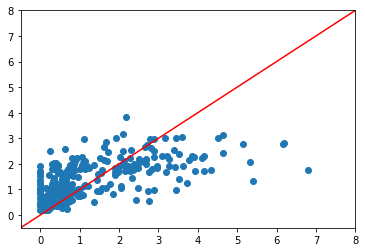

In [13]:
ytests_rf = ytests_dict["RF_opt"]
ypreds_rf = ypreds_dict["RF_opt"]
                        
plt.axis([-.5, 8, -.5, 8])
plt.scatter(ytests_rf,ypreds_rf)
plt.plot([-1, 8], [-1, 8], color='r')
plt.savefig("../Jupyter/results/figures/LOO_DCAA_" + "RF_opt" + "_20200505.pdf")
plt.show()                      

                        

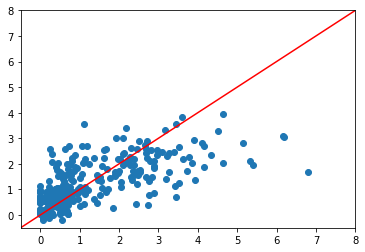

In [14]:
ytests_svr = ytests_dict["SVR_{rbf}_opt"]
ypreds_svr = ypreds_dict["SVR_{rbf}_opt"]
                        
plt.axis([-.5, 8, -.5, 8])
plt.scatter(ytests_svr,ypreds_svr)
plt.plot([-1, 8], [-1, 8], color='r')
plt.savefig("../Jupyter/results/figures/LOO_DCAA_" + "SVR_{rbf}_opt" + "_20200505.pdf")
plt.show()                      


In [15]:
svr_results = pd.DataFrame(ytests_svr)
svr_results["predicted"] = ypreds_svr
svr_results.to_excel("../Jupyter/excel/svr_results_DCAA_20200505.xlsx")

In [16]:
rf_results = pd.DataFrame(ytests_rf)
rf_results["predicted"] = ypreds_rf
rf_results.to_excel("../Jupyter/excel/rf_results_DCAA_20200505.xlsx")

In [17]:
#Calculate the LOO-CV for TCAA

ytests_dict = dict()
ypreds_dict = dict()

loo_q2_TCAA = dict()
loo_rmse_TCAA = dict ()

reg_list_TCAA = TCAA_regressors.keys()

Xr = X_scaled
yr = log_y[:,1]

for a in reg_list_TCAA:
    loo = LeaveOneOut()
    ytests = []
    ypreds = []
    for train_idx, test_idx in loo.split(Xr):
        X_train, X_test = Xr[train_idx], Xr[test_idx] #requires arrays
        y_train, y_test = yr[train_idx], yr[test_idx]
    
        #model = svm.SVR(kernel = "linear")
        TCAA_regressors[a].fit(X = X_train, y = y_train) 
        y_pred = TCAA_regressors[a].predict(X_test)
        
        # there is only one y-test and y-pred per iteration over the loo.split, 
        # so to get a proper graph, we append them to respective lists.
        
        ytests += list(y_test)
        ypreds += list(y_pred)
        
    ytests_dict[a] = ytests
    ypreds_dict[a] = ypreds
        
    loo_q2_TCAA[a] = metrics.r2_score(ytests, ypreds)
    loo_rmse_TCAA[a] = metrics.mean_squared_error(ytests, ypreds, squared = False)
        
    print("Leave One Out Cross Validation")
    print("LOO $Q^2$: {:.5f}%, MSE: {:.5f}".format(loo_q2_TCAA[a], loo_rmse_TCAA[a]))

Leave One Out Cross Validation
LOO $Q^2$: 0.56401%, MSE: 1.19361
Leave One Out Cross Validation
LOO $Q^2$: 0.56821%, MSE: 1.18786


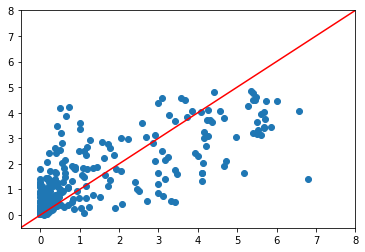

In [18]:
ytests_rf = ytests_dict["RF_opt"]
ypreds_rf = ypreds_dict["RF_opt"]
                        
plt.axis([-.5, 8, -.5, 8])
plt.scatter(ytests_rf,ypreds_rf)
plt.plot([-1, 8], [-1, 8], color='r')
plt.savefig("../Jupyter/results/figures/LOO_TCAA_" + "RF_opt_std" + "_20200505.pdf")
plt.show()  

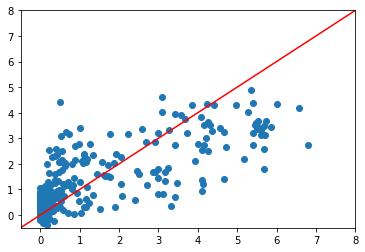

In [19]:
ytests_svr = ytests_dict["SVR_{rbf}_opt"]
ypreds_svr = ypreds_dict["SVR_{rbf}_opt"]
                        
plt.axis([-.5, 8, -.5, 8])
plt.scatter(ytests_svr,ypreds_svr)
plt.plot([-1, 8], [-1, 8], color='r')
plt.savefig("../Jupyter/results/figures/LOO_TCAA_" + "SVR_{rbf}_opt_def" + "_20200505.pdf")
plt.show()   

In [20]:
svr_results = pd.DataFrame(ytests_svr)
svr_results["predicted"] = ypreds_svr
svr_results.to_excel("../Jupyter/excel/svr_results_TCAA_20200505.xlsx")

In [21]:
rf_results = pd.DataFrame(ytests_rf)
rf_results["predicted"] = ypreds_rf
rf_results.to_excel("../Jupyter/excel/rf_results_TCAA_20200505_def.xlsx")

In [22]:
DCAA = {"RMSE_{CV}" : rmse_DCAA_cv,
        "Q^2" :r2_DCAA_cv,
       "RMSE_{ext}" : rmse_DCAA_ext,
       "R^2_{ext}" : r2_DCAA_ext,
       "LOO-RMSE" : loo_rmse_DCAA,
       "LOO-Q^2" : loo_q2_DCAA}

DCAA_df = pd.DataFrame.from_dict(DCAA)

DCAA_df

,RMSE_{CV},Q^2,RMSE_{ext},R^2_{ext},LOO-RMSE,LOO-Q^2
RF_opt,1.089201,0.284406,1.036384,0.41802,1.038827,0.388838
SVR_{rbf}_opt,1.083005,0.291494,1.015744,0.44097,0.991441,0.443323


In [23]:
TCAA = {"RMSE_{CV}" : rmse_TCAA_cv,
        "Q^2" :r2_TCAA_cv,
       "RMSE_{ext}" : rmse_TCAA_ext,
       "R^2_{ext}" : r2_TCAA_ext,
       "LOO-RMSE" : loo_rmse_TCAA,
       "LOO-Q^2" : loo_q2_TCAA}

TCAA_df = pd.DataFrame.from_dict(TCAA)

TCAA_df

,RMSE_{CV},Q^2,RMSE_{ext},R^2_{ext},LOO-RMSE,LOO-Q^2
RF_opt,1.240628,0.507552,1.166872,0.584302,1.193613,0.564013
SVR_{rbf}_opt,1.290184,0.467705,1.214291,0.549830,1.187859,0.568207


In [24]:
print(pd.DataFrame.to_latex(DCAA_df, index = True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  RMSE\_\{CV\} &       Q\textasciicircum 2 &  RMSE\_\{ext\} &  R\textasciicircum 2\_\{ext\} &  LOO-RMSE &   LOO-Q\textasciicircum 2 \\
\midrule
RF\_opt        &   1.089201 &  0.284406 &    1.036384 &    0.41802 &  1.038827 &  0.388838 \\
SVR\_\{rbf\}\_opt &   1.083005 &  0.291494 &    1.015744 &    0.44097 &  0.991441 &  0.443323 \\
\bottomrule
\end{tabular}



In [25]:
print(pd.DataFrame.to_latex(TCAA_df, index = True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  RMSE\_\{CV\} &       Q\textasciicircum 2 &  RMSE\_\{ext\} &  R\textasciicircum 2\_\{ext\} &  LOO-RMSE &   LOO-Q\textasciicircum 2 \\
\midrule
RF\_opt        &   1.240628 &  0.507552 &    1.166872 &   0.584302 &  1.193613 &  0.564013 \\
SVR\_\{rbf\}\_opt &   1.290184 &  0.467705 &    1.214291 &   0.549830 &  1.187859 &  0.568207 \\
\bottomrule
\end{tabular}



## Plotting the new regressors - with the scores

In [26]:
%store -r X_train
%store  -r X_test  
%store -r y_train
%store -r  y_test

/Users/andrescordero/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a1f807a58> has a label of '_fit' which cannot be automatically added to the legend.


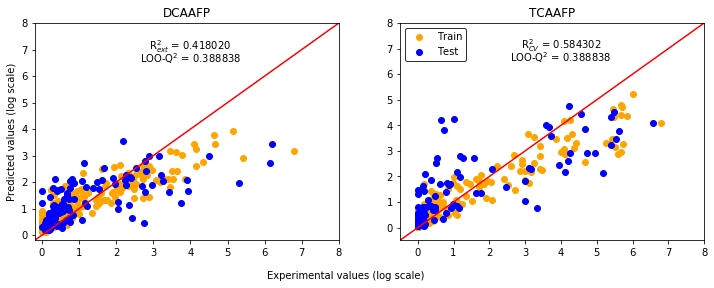

/Users/andrescordero/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a1ed6bba8> has a label of '_fit' which cannot be automatically added to the legend.


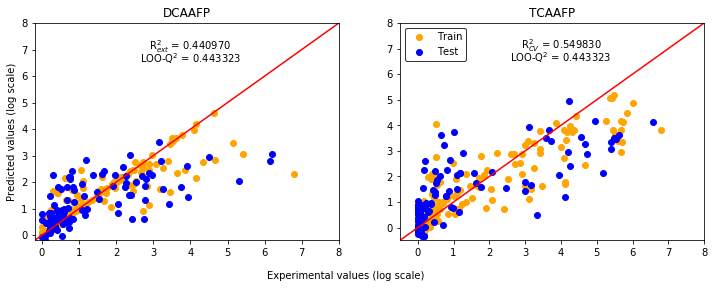

In [27]:
for a in reg_list_DCAA:
    fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (12,4))


    p1 = plt.subplot(121)
    p1.axis([-.2, 8, -.2, 8])
    p1.scatter((y_train[:,0]), (DCAA_regressors[a].predict(scaler.transform(X_train))), color='orange')
    p1.scatter((y_test[:,0]), (y_pred_DCAA[a]), color = "blue")
    p1.plot([-1, 8], [-1, 8], color='r')
    p1.set_title('DCAAFP')
    p1.text(4,7,"R$^2_{ext}$ = %f" %r2_DCAA_ext[a], horizontalalignment = "center", fontsize = 10)
    p1.text(4,6.5,"LOO-Q$^{2}$ = %f" %loo_q2_DCAA[a], horizontalalignment = "center", fontsize = 10)

    plt.ylabel("Predicted values (log scale)")

    p2 = plt.subplot(122)
    p2.axis([-.5, 8, -.5, 8])
    p2.scatter((y_train[:,1]), (TCAA_regressors[a].predict(scaler.transform(X_train))), color='orange')
    p2.scatter((y_test[:,1]), (y_pred_TCAA[a]), color = "blue")
    p2.plot([-1, 8], [-1, 8], color='r')
    p2.legend(("_fit","Train","Test" ), edgecolor = "black", mode = "none", loc = "upper left")
    p2.set_title('TCAAFP')
    p2.text(4,7,"R$^2_{CV}$ = %f" %r2_TCAA_ext[a], horizontalalignment = "center", fontsize = 10)
    p2.text(4,6.5,"LOO-Q$^{2}$ = %f" %loo_q2_DCAA[a], horizontalalignment = "center", fontsize = 10)



    plt.text(-2,-2,"Experimental values (log scale)", horizontalalignment = "center", fontsize = 10)


    plt.savefig("../Jupyter/results/figures/optimized_" + str(a) + "_20200505.pdf")
    plt.show()